In [359]:
#Visualization of Complex Data Final Project

#load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import seaborn as sns

In [360]:
#load restaurant file; setting Restaurant ID as index
df = pd.read_csv("dataset.csv", index_col = [0], low_memory=False, encoding = "ISO-8859-1")
df.head()

,Country Code,City,Cuisines,Price range,Aggregate rating
Restaurant ID,,,,,
6317637,162,Makati City,"French, Japanese, Desserts",3,4.8
6304287,162,Makati City,Japanese,3,4.5
6300002,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4,4.4
6318506,162,Mandaluyong City,"Japanese, Sushi",4,4.9
6314302,162,Mandaluyong City,"Japanese, Korean",4,4.8


In [361]:
df['Country Code'] = df['Country Code'].map({1: 'India', 14: 'Australia', 30: 'Brazil', 37: 'Canada',
                                            94: 'Indonesia', 148: 'New Zealand', 162: 'Philippines',
                                            166: 'Qatar', 184: 'Singapore', 189: 'South Africa',
                                            191: 'Sri Lanka', 208: 'Turkey', 214: 'UAE',
                                            215: 'United Kingdom', 216: 'United States'})

In [362]:
df.head()

,Country Code,City,Cuisines,Price range,Aggregate rating
Restaurant ID,,,,,
6317637,Philippines,Makati City,"French, Japanese, Desserts",3,4.8
6304287,Philippines,Makati City,Japanese,3,4.5
6300002,Philippines,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4,4.4
6318506,Philippines,Mandaluyong City,"Japanese, Sushi",4,4.9
6314302,Philippines,Mandaluyong City,"Japanese, Korean",4,4.8


In [363]:
df = df.rename(columns = {'Country Code':'Country', 'Price range': 'Price', 'Aggregate rating': 'Rating'})
df.head()

,Country,City,Cuisines,Price,Rating
Restaurant ID,,,,,
6317637,Philippines,Makati City,"French, Japanese, Desserts",3,4.8
6304287,Philippines,Makati City,Japanese,3,4.5
6300002,Philippines,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4,4.4
6318506,Philippines,Mandaluyong City,"Japanese, Sushi",4,4.9
6314302,Philippines,Mandaluyong City,"Japanese, Korean",4,4.8


In [364]:
df.isna().sum()

Country     0
City        0
Cuisines    0
Price       0
Rating      0
dtype: int64

In [365]:
df.to_csv('final_dataset.csv')

In [366]:
country = df['Country'].unique()
country

array(['Philippines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [367]:
np.savetxt("country.csv", country, header="Country", fmt='%s')

In [368]:
country_num = df.groupby('Country').size()
country_num = pd.DataFrame({'Country':country_num.index, 'Number':country_num.values})
country_num.index = np.arange(1, len(country_num)+1)
country_num

,Country,Number
1,Australia,24
2,Brazil,60
3,Canada,4
4,India,8652
5,Indonesia,21
6,New Zealand,40
7,Philippines,22
8,Qatar,20
9,Singapore,20
10,South Africa,60


In [369]:
rating = df.groupby('Country')['Rating'].mean()
country_num['Rating'] = rating.values
country_num['Rating'] = country_num['Rating'].round(2)
price = df.groupby('Country')['Price'].mean()
country_num['Price'] = price.values
country_num['Price'] = country_num['Price'].round(2)
country_num

,Country,Number,Rating,Price
1,Australia,24,3.66,2.12
2,Brazil,60,3.76,3.40
3,Canada,4,3.58,2.50
4,India,8652,2.52,1.72
5,Indonesia,21,4.30,2.95
6,New Zealand,40,4.26,3.15
7,Philippines,22,4.47,3.36
8,Qatar,20,4.06,3.65
9,Singapore,20,3.58,3.65
10,South Africa,60,4.21,3.58


In [370]:
country_num.to_csv('country_num.csv')

In [371]:
cuisine_num = df['Cuisines'].str.split(',\s+', expand=True).stack().value_counts()
cuisine_num = pd.DataFrame({'Cuisine':cuisine_num.index, 'Number':cuisine_num.values})
cuisine_num.index = np.arange(1, len(cuisine_num)+1)
cuisine_num

,Cuisine,Number
1,North Indian,3960
2,Chinese,2735
3,Fast Food,1986
4,Mughlai,995
5,Italian,764
6,Bakery,745
7,Continental,736
8,Cafe,703
9,Desserts,653
10,South Indian,636


In [372]:
df['Cuisines'] = df['Cuisines'].replace({'North Indian':'Indian', 'South Indian':'Indian', 'Modern Indian':'Indian', 
                                    'Coffee and Tea':'Beverages', 'Drinks Only':'Beverages', 'Bubble Tea':'Beverages', 
                                    'Ramen':'Japanese', 'World Cuisine':'International', 'Asian Fusion':'Asian', 
                                    'Gourmet Fast Food':'Fast Food'}, regex=True)

In [373]:
df['Cuisines'] = df['Cuisines'].str.split(', ').apply(set).str.join(', ')
cuisine_num = df['Cuisines'].str.split(',\s+', expand=True).stack().value_counts()
cuisine_num = pd.DataFrame({'Cuisine':cuisine_num.index, 'Number':cuisine_num.values})
cuisine_num.index = np.arange(1, len(cuisine_num)+1)
cuisine_num

,Cuisine,Number
1,Indian,4259
2,Chinese,2733
3,Fast Food,1987
4,Mughlai,994
5,Italian,764
6,Bakery,744
7,Continental,736
8,Cafe,703
9,Desserts,653
10,Street Food,562


In [374]:
cuisine_num.to_csv('cuisine_num.csv')

In [375]:
indian = df[df['Cuisines'].str.contains("Indian")]
chinese = df[df['Cuisines'].str.contains("Chinese")]
ff = df[df['Cuisines'].str.contains("Fast Food")]
mughlai = df[df['Cuisines'].str.contains("Mughlai")]
italian = df[df['Cuisines'].str.contains("Italian")]

In [376]:
country_num_indian = indian.groupby('Country').size()
country_num_indian = pd.DataFrame({'Country':country_num_indian.index, 'Number':country_num_indian.values})
country_num_indian.index = np.arange(1, len(country_num_indian)+1)

In [377]:
rating = indian.groupby('Country')['Rating'].mean()
country_num_indian['Rating'] = rating.values
country_num_indian['Rating'] = country_num_indian['Rating'].round(2)
price = indian.groupby('Country')['Price'].mean()
country_num_indian['Price'] = price.values
country_num_indian['Price'] = country_num_indian['Price'].round(2)
country_num_indian

,Country,Number,Rating,Price
1,Brazil,1,3.10,3.00
2,India,4191,2.50,1.84
3,Philippines,2,4.65,4.00
4,Qatar,8,4.01,3.38
5,Singapore,1,3.00,3.00
6,South Africa,2,4.35,4.00
7,Sri Lanka,3,2.80,2.33
8,UAE,26,4.34,3.08
9,United Kingdom,17,4.13,2.53
10,United States,8,3.46,1.88


In [378]:
country_num_indian.to_csv('country_num_indian.csv')

In [379]:
country_num_chinese = chinese.groupby('Country').size()
country_num_chinese = pd.DataFrame({'Country':country_num_chinese.index, 'Number':country_num_chinese.values})
country_num_chinese.index = np.arange(1, len(country_num_chinese)+1)

In [380]:
rating = chinese.groupby('Country')['Rating'].mean()
country_num_chinese['Rating'] = rating.values
country_num_chinese['Rating'] = country_num_chinese['Rating'].round(2)
price = chinese.groupby('Country')['Price'].mean()
country_num_chinese['Price'] = price.values
country_num_chinese['Price'] = country_num_chinese['Price'].round(2)
country_num_chinese

,Country,Number,Rating,Price
1,Canada,1,3.00,2.00
2,India,2688,2.60,1.89
3,New Zealand,1,4.30,2.00
4,Philippines,1,4.40,3.00
5,Qatar,3,4.23,3.33
6,Singapore,3,3.43,3.67
7,Sri Lanka,3,2.77,2.67
8,UAE,9,4.14,3.33
9,United Kingdom,2,4.75,4.00
10,United States,22,3.99,1.64


In [381]:
country_num_chinese.to_csv('country_num_chinese.csv')

In [382]:
country_num_ff = ff.groupby('Country').size()
country_num_ff = pd.DataFrame({'Country':country_num_ff.index, 'Number':country_num_ff.values})
country_num_ff.index = np.arange(1, len(country_num_ff)+1)

In [383]:
rating = ff.groupby('Country')['Rating'].mean()
country_num_ff['Rating'] = rating.values
country_num_ff['Rating'] = country_num_ff['Rating'].round(2)
price = ff.groupby('Country')['Price'].mean()
country_num_ff['Price'] = price.values
country_num_ff['Price'] = country_num_ff['Price'].round(2)
country_num_ff

,Country,Number,Rating,Price
1,Brazil,3,3.93,3.00
2,India,1963,2.55,1.45
3,New Zealand,1,4.50,1.00
4,Singapore,1,3.20,4.00
5,South Africa,1,3.60,3.00
6,Sri Lanka,3,4.03,2.67
7,UAE,5,3.76,2.60
8,United Kingdom,4,3.20,1.50
9,United States,6,3.78,1.33


In [384]:
country_num_ff.to_csv('country_num_ff.csv')

In [385]:
country_num_mughlai = mughlai.groupby('Country').size()
country_num_mughlai = pd.DataFrame({'Country':country_num_mughlai.index, 'Number':country_num_mughlai.values})
country_num_mughlai.index = np.arange(1, len(country_num_mughlai)+1)

In [386]:
rating = mughlai.groupby('Country')['Rating'].mean()
country_num_mughlai['Rating'] = rating.values
country_num_mughlai['Rating'] = country_num_mughlai['Rating'].round(2)
price = mughlai.groupby('Country')['Price'].mean()
country_num_mughlai['Price'] = price.values
country_num_mughlai['Price'] = country_num_mughlai['Price'].round(2)
country_num_mughlai

,Country,Number,Rating,Price
1,India,991,2.61,2.00
2,UAE,3,4.10,3.33


In [387]:
country_num_mughlai.to_csv('country_num_mughlai.csv')

In [388]:
country_num_italian = italian.groupby('Country').size()
country_num_italian = pd.DataFrame({'Country':country_num_italian.index, 'Number':country_num_italian.values})
country_num_italian.index = np.arange(1, len(country_num_italian)+1)

In [389]:
rating = italian.groupby('Country')['Rating'].mean()
country_num_italian['Rating'] = rating.values
country_num_italian['Rating'] = country_num_italian['Rating'].round(2)
price = italian.groupby('Country')['Price'].mean()
country_num_italian['Price'] = price.values
country_num_italian['Price'] = country_num_italian['Price'].round(2)
country_num_italian

,Country,Number,Rating,Price
1,Australia,1,3.80,1.00
2,Brazil,6,4.10,4.00
3,Canada,1,4.30,4.00
4,India,682,3.50,2.66
5,Indonesia,2,4.35,3.00
6,New Zealand,3,4.43,4.00
7,Philippines,4,4.12,3.50
8,Qatar,1,4.50,4.00
9,Singapore,2,3.65,3.50
10,South Africa,7,4.07,3.86


In [390]:
country_num_italian.to_csv('country_num_italian.csv')

In [391]:
#ratings_num = df['Cuisines'].str.split(',\s+', expand=True).stack().value_counts()
ratings_num = df.groupby(["Country", "Rating"]).size()
ratings_num

Country         Rating
Australia       2.4        1
                2.6        1
                2.9        1
                3.2        1
                3.4        1
                3.5        3
                3.6        3
                3.7        3
                3.8        4
                4.1        3
                4.4        2
                4.6        1
Brazil          0.0        5
                3.0        1
                3.1        3
                3.2        2
                3.3        1
                3.4        1
                3.5        1
                3.6        3
                3.7        3
                3.8        2
                3.9        2
                4.0        3
                4.1        3
                4.2        4
                4.3        6
                4.4        4
                4.5        2
                4.6        6
                          ..
United Kingdom  4.2        5
                4.3        5
                4.4 

([<matplotlib.axis.XTick at 0x1a14eb7208>,
 <a list of 9 Text xticklabel objects>)

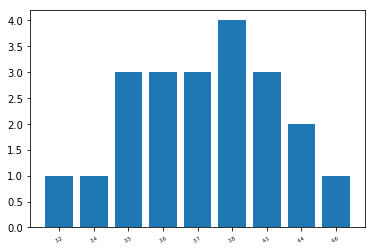

In [392]:
best_rated = df.loc[(df['Rating'] >= 3)]
best_rated = best_rated[['Country','Rating']]
best_rated = best_rated.groupby(["Country", "Rating"]).size()
plt.bar(np.arange(len(best_rated['Australia'].index)), best_rated['Australia'].values)
plt.xticks(np.arange(len(best_rated['Australia'].index)), best_rated['Australia'].index, fontsize=5, rotation=30)

In [393]:
best_rated = pd.DataFrame({'Rating':best_rated.index, 'Number':best_rated.values})
best_rated.index = np.arange(1, len(best_rated)+1)

In [394]:
best_rated.to_csv('best_rated.csv')

In [395]:
# best_rated_cuisine_num = best_rated['Cuisines'].str.split(',\s+', expand=True).stack().value_counts()
# best_rated_cuisine_num

In [396]:
ratings_price_num = df.groupby(["Country", "Rating", "Price"]).size()
ratings_price_num

Country        Rating  Price
Australia      2.4     3         1
               2.6     4         1
               2.9     2         1
               3.2     2         1
               3.4     2         1
               3.5     2         2
                       3         1
               3.6     1         1
                       2         2
               3.7     1         1
                       2         2
               3.8     1         2
                       2         1
                       3         1
               4.1     2         3
               4.4     3         2
               4.6     2         1
Brazil         0.0     1         1
                       2         2
                       3         2
               3.0     2         1
               3.1     3         2
                       4         1
               3.2     2         1
                       4         1
               3.3     4         1
               3.4     4         1
               3.5     4  

In [397]:
ratings_price_num = df.groupby(["Country", "Rating", "Price"]).size()
ratings_price_num['India']

Rating  Price
0.0     1        1699
        2         396
        3          33
        4          11
1.8     3           1
1.9     1           1
        2           1
2.0     1           3
        2           2
        3           1
        4           1
2.1     1           6
        2           7
        3           2
2.2     1           9
        2          15
        3           1
        4           1
2.3     1          13
        2          32
        3           1
2.4     1          29
        2          39
        3          12
        4           3
2.5     1          32
        2          66
        3          10
        4           1
2.6     1          68
                 ... 
4.2     2          43
        3          63
        4          18
4.3     1          15
        2          32
        3          34
        4          19
4.4     1           3
        2          22
        3          35
        4          14
4.5     1           6
        2           9
        3         

In [398]:
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia', 'Rio de Janeiro', 'Sí£o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentham East', '

In [399]:
pri_rat = df[['Country', 'Price', 'Rating']].copy()

In [400]:
price_rating = pri_rat.groupby('Country').mean()

In [401]:
price_rating.round(2)

,Price,Rating
Country,,
Australia,2.12,3.66
Brazil,3.40,3.76
Canada,2.50,3.58
India,1.72,2.52
Indonesia,2.95,4.30
New Zealand,3.15,4.26
Philippines,3.36,4.47
Qatar,3.65,4.06
Singapore,3.65,3.58


In [402]:
city_num = df.groupby('City').size()
city_num = pd.DataFrame({'City':city_num.index, 'Number':city_num.values})
city_num.index = np.arange(1, len(city_num)+1)
city_num.head()

,City,Number
1,Abu Dhabi,20
2,Agra,20
3,Ahmedabad,21
4,Albany,17
5,Allahabad,20


In [403]:
city_num = city_num.sort_values(by=['Number'], ascending=False)
city_num.head()

,City,Number
88,New Delhi,5473
51,Gurgaon,1118
89,Noida,1080
44,Faridabad,251
49,Ghaziabad,25


In [404]:
new_delhi = df.loc[(df['City'] == 'New Delhi')]
new_delhi = new_delhi[['Cuisines']]

In [405]:
new_delhi = new_delhi['Cuisines'].str.split(',\s+', expand=True).stack().value_counts()
new_delhi = pd.DataFrame({'Cuisine':new_delhi.index, 'Number':new_delhi.values})
new_delhi.index = np.arange(1, len(new_delhi)+1)
new_delhi.head()

,Cuisine,Number
1,Indian,2606
2,Chinese,1638
3,Fast Food,1304
4,Mughlai,628
5,Bakery,465


In [406]:
# new_delhi['percent'] = round((new_delhi['Number']/new_delhi['Number'].sum()) * 100, 2)
# new_delhi = new_delhi.drop(['Number'], axis=1)
# new_delhi.head()

In [407]:
new_delhi = new_delhi[:19]
new_delhi = new_delhi.drop(new_delhi.index[[7,13,14,15,16,17]])
new_delhi.loc[20] = ['Other', 16.87]
new_delhi = new_delhi.reset_index()
new_delhi = new_delhi.drop(['index'], axis=1)
new_delhi

,Cuisine,Number
0,Indian,2606.00
1,Chinese,1638.00
2,Fast Food,1304.00
3,Mughlai,628.00
4,Bakery,465.00
5,Street Food,411.00
6,Desserts,383.00
7,Continental,373.00
8,Cafe,325.00
9,Mithai,282.00


In [408]:
new_delhi.to_csv('new_delhi.csv')

In [409]:
gurgaon = df.loc[(df['City'] == 'Gurgaon')]
gurgaon = gurgaon[['Cuisines']]

In [410]:
gurgaon = gurgaon['Cuisines'].str.split(',\s+', expand=True).stack().value_counts()
gurgaon = pd.DataFrame({'Cuisine':gurgaon.index, 'Number':gurgaon.values})
gurgaon.index = np.arange(1, len(gurgaon)+1)
gurgaon.head()

,Cuisine,Number
1,Indian,525
2,Chinese,324
3,Fast Food,220
4,Mughlai,117
5,Bakery,109


In [411]:
# gurgaon['percent'] = round((gurgaon['Number']/gurgaon['Number'].sum()) * 100, 2)
# gurgaon = gurgaon.drop(['Number'], axis=1)
# gurgaon.head()

In [412]:
gurgaon = gurgaon[:23]
gurgaon = gurgaon.drop(gurgaon.index[[6,11,13,14,15,17,18,19,20,21]])
gurgaon.loc[24] = ['Other', 24.27]
gurgaon = gurgaon.reset_index()
gurgaon = gurgaon.drop(['index'], axis=1)
gurgaon

,Cuisine,Number
0,Indian,525.00
1,Chinese,324.00
2,Fast Food,220.00
3,Mughlai,117.00
4,Bakery,109.00
5,Continental,103.00
6,Cafe,78.00
7,Desserts,77.00
8,Street Food,72.00
9,Mithai,44.00


In [413]:
gurgaon.to_csv('gurgaon.csv')

In [414]:
noida = df.loc[(df['City'] == 'Noida')]
noida = noida[['Cuisines']]

In [415]:
noida = noida['Cuisines'].str.split(',\s+', expand=True).stack().value_counts()
noida = pd.DataFrame({'Cuisine':noida.index, 'Number':noida.values})
noida.index = np.arange(1, len(noida)+1)
noida.head()

,Cuisine,Number
1,Indian,548
2,Chinese,384
3,Fast Food,265
4,Mughlai,155
5,Bakery,93


In [416]:
# noida['percent'] = round((noida['Number']/noida['Number'].sum()) * 100, 2)
# noida = noida.drop(['Number'], axis=1)
# noida.head()

In [417]:
noida = noida[:19]
noida = noida.drop(noida.index[[6,9,14,15,16,17]])
noida.loc[20] = ['Other', 15.43]
noida = noida.reset_index()
noida = noida.drop(['index'], axis=1)
noida

,Cuisine,Number
0,Indian,548.00
1,Chinese,384.00
2,Fast Food,265.00
3,Mughlai,155.00
4,Bakery,93.00
5,Cafe,69.00
6,Desserts,64.00
7,Continental,62.00
8,Street Food,39.00
9,Pizza,36.00


In [418]:
noida.to_csv('noida.csv')

In [419]:
faridabad = df.loc[(df['City'] == 'Faridabad')]
faridabad = faridabad[['Cuisines']]

In [420]:
faridabad = faridabad['Cuisines'].str.split(',\s+', expand=True).stack().value_counts()
faridabad = pd.DataFrame({'Cuisine':faridabad.index, 'Number':faridabad.values})
faridabad.index = np.arange(1, len(faridabad)+1)
faridabad.head()

,Cuisine,Number
1,Indian,127
2,Chinese,96
3,Fast Food,69
4,Mughlai,30
5,Bakery,27


In [421]:
# faridabad['percent'] = round((faridabad['Number']/faridabad['Number'].sum()) * 100, 2)
# faridabad = faridabad.drop(['Number'], axis=1)
# faridabad.head()

In [422]:
faridabad = faridabad[:16]
faridabad = faridabad.drop(faridabad.index[[9,10,11]])
faridabad.loc[17] = ['Other', 10.06]
faridabad = faridabad.reset_index()
faridabad = faridabad.drop(['index'], axis=1)
faridabad

,Cuisine,Number
0,Indian,127.00
1,Chinese,96.00
2,Fast Food,69.00
3,Mughlai,30.00
4,Bakery,27.00
5,Mithai,19.00
6,Cafe,15.00
7,Desserts,15.00
8,Street Food,15.00
9,Continental,8.00


In [423]:
faridabad.to_csv('faridabad.csv')

In [424]:
ghaziabad = df.loc[(df['City'] == 'Ghaziabad')]
ghaziabad = ghaziabad[['Cuisines']]

In [425]:
ghaziabad = ghaziabad['Cuisines'].str.split(',\s+', expand=True).stack().value_counts()
ghaziabad = pd.DataFrame({'Cuisine':ghaziabad.index, 'Number':ghaziabad.values})
ghaziabad.index = np.arange(1, len(ghaziabad)+1)
ghaziabad.head()

,Cuisine,Number
1,Indian,11
2,Fast Food,8
3,Chinese,6
4,Cafe,4
5,Burger,3


In [426]:
# ghaziabad['percent'] = round((ghaziabad['Number']/ghaziabad['Number'].sum()) * 100, 2)
# ghaziabad = ghaziabad.drop(['Number'], axis=1)
ghaziabad.loc[13] = ['Other', 0]
ghaziabad = ghaziabad.reset_index()
ghaziabad = ghaziabad.drop(['index'], axis=1)
ghaziabad

,Cuisine,Number
0,Indian,11
1,Fast Food,8
2,Chinese,6
3,Cafe,4
4,Burger,3
5,Desserts,3
6,Ice Cream,2
7,Mughlai,2
8,Bakery,2
9,Street Food,1


In [427]:
ghaziabad.to_csv('ghaziabad.csv')

In [428]:
data1 = new_delhi.set_index('Cuisine').T
data1 = data1.rename(index={'Number': 'New Delhi'})
data1

Cuisine,Indian,Chinese,Fast Food,Mughlai,Bakery,Street Food,Desserts,Continental,Cafe,Mithai,Pizza,Ice Cream,Burger,Other
New Delhi,2606.0,1638.0,1304.0,628.0,465.0,411.0,383.0,373.0,325.0,282.0,197.0,148.0,90.0,16.87


In [429]:
data2 = gurgaon.set_index('Cuisine').T
data2 = data2.rename(index={'Number': 'Gurgaon'})
data2

Cuisine,Indian,Chinese,Fast Food,Mughlai,Bakery,Continental,Cafe,Desserts,Street Food,Mithai,Pizza,Burger,Ice Cream,Other
Gurgaon,525.0,324.0,220.0,117.0,109.0,103.0,78.0,77.0,72.0,44.0,43.0,36.0,21.0,24.27


In [430]:
data3 = noida.set_index('Cuisine').T
data3 = data3.rename(index={'Number': 'Noida'})
data3

Cuisine,Indian,Chinese,Fast Food,Mughlai,Bakery,Cafe,Desserts,Continental,Street Food,Pizza,Mithai,Ice Cream,Burger,Other
Noida,548.0,384.0,265.0,155.0,93.0,69.0,64.0,62.0,39.0,36.0,33.0,32.0,18.0,15.43


In [431]:
data4 = faridabad.set_index('Cuisine').T
data4 = data4.rename(index={'Number': 'Faridabad'})
data4

Cuisine,Indian,Chinese,Fast Food,Mughlai,Bakery,Mithai,Cafe,Desserts,Street Food,Continental,Ice Cream,Burger,Pizza,Other
Faridabad,127.0,96.0,69.0,30.0,27.0,19.0,15.0,15.0,15.0,8.0,7.0,5.0,5.0,10.06


In [432]:
data5 = ghaziabad.set_index('Cuisine').T
data5 = data5.rename(index={'Number': 'Ghaziabad'})
data5

Cuisine,Indian,Fast Food,Chinese,Cafe,Burger,Desserts,Ice Cream,Mughlai,Bakery,Street Food,Mithai,Pizza,Other
Ghaziabad,11,8,6,4,3,3,2,2,2,1,1,1,0


In [433]:
data = data1.append(data2)
data = data.append(data3)
data = data.append(data4)
data = data.append(data5)

In [434]:
data

,Bakery,Burger,Cafe,Chinese,Continental,Desserts,Fast Food,Ice Cream,Indian,Mithai,Mughlai,Other,Pizza,Street Food
New Delhi,465.0,90.0,325.0,1638.0,373.0,383.0,1304.0,148.0,2606.0,282.0,628.0,16.87,197.0,411.0
Gurgaon,109.0,36.0,78.0,324.0,103.0,77.0,220.0,21.0,525.0,44.0,117.0,24.27,43.0,72.0
Noida,93.0,18.0,69.0,384.0,62.0,64.0,265.0,32.0,548.0,33.0,155.0,15.43,36.0,39.0
Faridabad,27.0,5.0,15.0,96.0,8.0,15.0,69.0,7.0,127.0,19.0,30.0,10.06,5.0,15.0
Ghaziabad,2.0,3.0,4.0,6.0,NaN,3.0,8.0,2.0,11.0,1.0,2.0,0.00,1.0,1.0


In [435]:
data.to_csv('city_cuisine.csv')